<a href="https://colab.research.google.com/github/tanhata/Property_Borough_Assessment/blob/main/Property_Borough_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
import csv
!pip install fsspec

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('drive/MyDrive/DATA')
os.getcwd()

FileNotFoundError: ignored

In [ ]:
!ls

Property_Valuation_and_Assessment_Data.csv


In [ ]:
# Read file as panda dataframe
propVal = pd.read_csv('Property_Valuation_and_Assessment_Data.csv')

In [ ]:
#1st step: lets just look at the dataset
  #a)look at the first five rows
propVal.head()

,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,POSTCODE,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,New Georeferenced Column
0,1000163859,1,16,3859,NaN,"CHEN, QI TOM",R4,2,0,0,NaN,31.0,354180,3310,159381,3310,159381,6800.0,1 RIVER TERRACE,NaN,NaN,0,0,3310.0,148953.0,3310.0,148953.0,NaN,FINAL,2018/19,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000730028,1,73,28,NaN,NYC DSBS,V1,4,183,52,NaN,NaN,3515000,1581750,1581750,1581750,1581750,2191.0,MARGINAL STREET,10038.0,X1,0,0,1080594.0,1080594.0,1080594.0,1080594.0,NaN,FINAL,2018/19,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000730029,1,73,29,NaN,NYC DSBS,Y7,4,90,500,NaN,1.0,8215000,2812050,3696750,2812050,3696750,2191.0,MARGINAL STREET,10038.0,X1,90,258,2812050.0,3487680.0,2812050.0,3487680.0,NaN,FINAL,2018/19,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000297504,1,29,7504,NaN,NaN,R0,2,36,73,NaN,7.0,0,0,0,0,0,NaN,54 STANTON ST EXTENSION,10004.0,NaN,36,73,NaN,NaN,NaN,NaN,NaN,FINAL,2018/19,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000360012,1,36,12,NaN,NYC DSBS,Y7,4,534,604,NaN,NaN,26246000,9180000,11810700,9180000,11810700,2191.0,PIER 9,NaN,X1,0,604,9180000.0,11142540.0,9180000.0,11142540.0,NaN,FINAL,2018/19,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#1st step: lets just look at the dataset
  #b)checking the shape: # of rows, # of columns
propVal.shape

(9845857, 40)

In [ ]:
 #1st step: lets just look at the dataset
  #c)lets look at dtypes, so what kind of things are inside this dataset, for every column-- this is useful because object types can often contain lists and dictionaries
propVal.dtypes

BBLE                         object
BORO                          int64
BLOCK                         int64
LOT                           int64
EASEMENT                     object
OWNER                        object
BLDGCL                       object
TAXCLASS                     object
LTFRONT                       int64
LTDEPTH                       int64
EXT                          object
STORIES                     float64
FULLVAL                       int64
AVLAND                        int64
AVTOT                         int64
EXLAND                        int64
EXTOT                         int64
EXCD1                       float64
STADDR                       object
POSTCODE                    float64
EXMPTCL                      object
BLDFRONT                      int64
BLDDEPTH                      int64
AVLAND2                     float64
AVTOT2                      float64
EXLAND2                     float64
EXTOT2                      float64
EXCD2                       

In [ ]:
#lets check if NA is within the dataset, if so, lets get the total number of NAs in the columns (respectively)
propVal.isna().sum()

BBLE                              0
BORO                              0
BLOCK                             0
LOT                               0
EASEMENT                    9804549
OWNER                        215681
BLDGCL                            0
TAXCLASS                          0
LTFRONT                           0
LTDEPTH                           0
EXT                         6664339
STORIES                      508578
FULLVAL                           0
AVLAND                            0
AVTOT                             0
EXLAND                            0
EXTOT                             0
EXCD1                       4620538
STADDR                         6032
POSTCODE                     249770
EXMPTCL                     9707249
BLDFRONT                          0
BLDDEPTH                          0
AVLAND2                     7138565
AVTOT2                      7138545
EXLAND2                     9053479
EXTOT2                      8616020
EXCD2                       

In [ ]:
#Let's ask some questions!
  #How many properties are listed here?
  #How much is the total property value for all the properties?
  #What years is this dataset in reference to?
  #How many properties are listed per year?
  #What is the average property value per borough?
  #Which borough has the highest property values? the lowest?
  #What is the average property value per borough per years?

In [ ]:
#How many properties are listed here? --> number of rows
#we can use len
len(propVal)
#we can also use .shape
propVal.shape

(9845857, 40)

In [ ]:
#How much is total property value for all the properties? --> sum of FULLVAL
#just the sum of value
propVal['FULLVAL'].sum()

10243277327983

In [ ]:
#What years is this dataset in reference to?
pd.unique(propVal['YEAR'])

array(['2018/19', '2017/18', '2016/17', '2015/16', '2014/15', '2013/14',
       '2012/13', '2010/11', '2011/12'], dtype=object)

In [ ]:
#How many properties are listed per year?
#extracting from YEARs, printing all together
prop1011 = propVal[propVal['YEAR'] == '2010/11']
prop1112 = propVal[propVal['YEAR'] == '2011/12']
prop1213 = propVal[propVal['YEAR'] == '2012/13']
prop1314 = propVal[propVal['YEAR'] == '2013/14']
prop1415 = propVal[propVal['YEAR'] == '2014/15']
prop1516 = propVal[propVal['YEAR'] == '2015/16']
prop1617 = propVal[propVal['YEAR'] == '2016/17']
prop1718 = propVal[propVal['YEAR'] == '2017/18']
prop1819 = propVal[propVal['YEAR'] == '2018/19']

#printing rows belonging the year and length 
#print(prop1011),(len(prop1011))

print(len(prop1011)),(len(prop1112)),(len(prop1213)),(len(prop1314)),(len(prop1415)),(len(prop1516)),(len(prop1617)),(len(prop1718)),(len(prop1819))

1070995


(None, 1080569, 1086396, 1088350, 1093327, 1096247, 1103323, 1110058, 1116592)

In [ ]:
#How many properties are listed per year? printing one by one
#extracting from YEAR, 2016/17
prop1617 = propVal[propVal['YEAR'] == '2016/17']
prop1617
len(prop1617)

1103323

In [ ]:
#What is the average property value per borough?
#>>>let's see what the boroughs are
pd.unique(propVal['BORO'])
pd.unique(propVal['Borough'])


array([nan, 'MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN IS'],
      dtype=object)

In [ ]:
#What is the average property value per borough?
#>>> first let's see how many properties per borough, similar to above 

prop_MN = propVal[propVal['Borough']== 'MANHATTAN']
prop_BX = propVal[propVal['Borough']== 'BRONX']
prop_BK= propVal[propVal['Borough']=='BROOKLYN']
prop_Q = propVal[propVal['Borough']=='QUEENS']
prop_SI = propVal[propVal['Borough']== 'STATEN IS']

print(len(prop_MN)), (len(prop_BX)), (len(prop_BK)), (len([prop_Q])), (len(prop_SI))

1367427


(None, 929433, 2924705, 1, 1123915)

In [ ]:
#Queens
len(propVal[propVal['Borough']== 'QUEENS'])

3158322

In [ ]:
#Brooklyn
len(propVal[propVal['Borough']== 'BROOKLYN'])

2924705

In [ ]:
#THEBronx
len(propVal[propVal['Borough']== 'BRONX'])

929433

In [ ]:
#MN
len(propVal[propVal['Borough']== 'MANHATTAN'])

1367427

In [ ]:
#average price of MN
prop_MN = propVal[propVal['Borough']== 'MANHATTAN']
mean_MN = prop_MN['FULLVAL'].mean()
median_MN = prop_MN['FULLVAL'].median()
mode_MN = prop_MN['FULLVAL'].mode()

print((mean_MN), (median_MN), (mode_MN))

2930445.187503245 319119.0 0    0
dtype: int64


In [ ]:
#average price of BK
prop_BK = propVal[propVal['Borough']== 'BROOKLYN']
mean_BK = prop_BK['FULLVAL'].mean()
median_BK = prop_BK['FULLVAL'].median()
mode_BK = prop_BK['FULLVAL'].mode()

print((mean_BK), (median_BK), (mode_BK))

796716.9819233051 549000.0 0    0
dtype: int64


In [ ]:
#average price of BX
prop_BX = propVal[propVal['Borough']== 'BRONX']
mean_BX = prop_BX['FULLVAL'].mean()
median_BX = prop_BX['FULLVAL'].median()

print((mean_BX), (median_BX))

728494.4776116192 415000.0


In [ ]:
#average price of SI
prop_SI = propVal[propVal['Borough']== 'STATEN IS']
mean_SI = prop_SI['FULLVAL'].mean()
median_SI = prop_SI['FULLVAL'].median()

print((mean_SI), (median_SI))

514003.68627876666 415000.0


In [ ]:
#average price of Q
prop_Q = propVal[propVal['Borough']== 'QUEENS']
mean_Q = prop_Q['FULLVAL'].mean()
median_Q = prop_Q['FULLVAL'].median()

print((mean_Q), (median_Q))

708274.9304263466 519000.0


In [ ]:
#Which borough has the highest property values? the lowest? ---> MN(highest), BK, BX, Q, SI (lowest)
mean_NYC=[mean_MN,mean_Q,mean_BK,mean_BX,mean_SI]
print(mean_NYC)

[2930445.187503245, 708274.9304263466, 796716.9819233051, 728494.4776116192, 514003.68627876666]


In [ ]:
#using groupby to create a new table of values which are averaged (mean)
prop_group = propVal.groupby(by='Borough', observed=True).mean()

In [ ]:
prop_group

,BORO,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,POSTCODE,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,Latitude,Longitude,Community Board,Council District,Census Tract,BIN
Borough,,,,,,,,,,,,,,,,,,,,,,,,,,
BRONX,2.0,4109.486631,520.789426,39.506335,89.201507,3.530768,7.284945e+05,41095.925510,2.012918e+05,19743.894957,115049.079682,1629.744594,10464.122158,26.684745,43.038278,105363.253896,5.717230e+05,281345.743569,5.691313e+05,1689.114723,40.850524,-73.864344,208.691242,14.320983,6118.658206,2.059989e+06
BROOKLYN,3.0,4568.484439,312.424544,28.969840,87.669418,3.236738,7.967170e+05,32497.691000,1.258985e+05,13084.351545,57046.345683,1881.797181,11220.286474,21.490539,43.866136,101706.541694,4.533359e+05,140164.741421,4.395699e+05,1544.456790,40.649462,-73.955440,309.825863,40.945661,4309.750685,3.170565e+06
MANHATTAN,1.0,1096.050609,1148.625972,34.963317,51.363098,18.915636,2.930445e+06,318830.958099,1.178915e+06,100228.757129,319628.031543,3149.086764,10034.176175,29.574154,41.293839,350644.497102,1.195589e+06,477083.163572,8.792201e+05,1867.566363,40.761800,-73.977048,105.974186,4.243917,2238.678050,1.050616e+06
QUEENS,4.0,6987.873028,195.663789,35.998554,94.010081,2.687570,7.082749e+05,43683.620545,1.320077e+05,21326.186023,62377.035013,1411.692069,11377.942968,23.211494,39.365979,195929.604873,6.399821e+05,338168.001492,8.261010e+05,1109.283131,40.719672,-73.823622,408.175977,25.720012,16648.036978,4.198638e+06
STATEN IS,5.0,3346.946392,201.147574,44.316637,101.160162,2.023088,5.140037e+05,26202.898682,6.285956e+04,12440.700246,28184.918211,1161.906585,10308.220173,24.126799,37.885705,250611.163153,6.081301e+05,671132.774827,1.253412e+06,1023.076056,40.583976,-74.141198,502.071277,50.108093,10978.517250,5.071998e+06


Text(0, 0.5, 'PROPERTY VALUE(MEAN)')

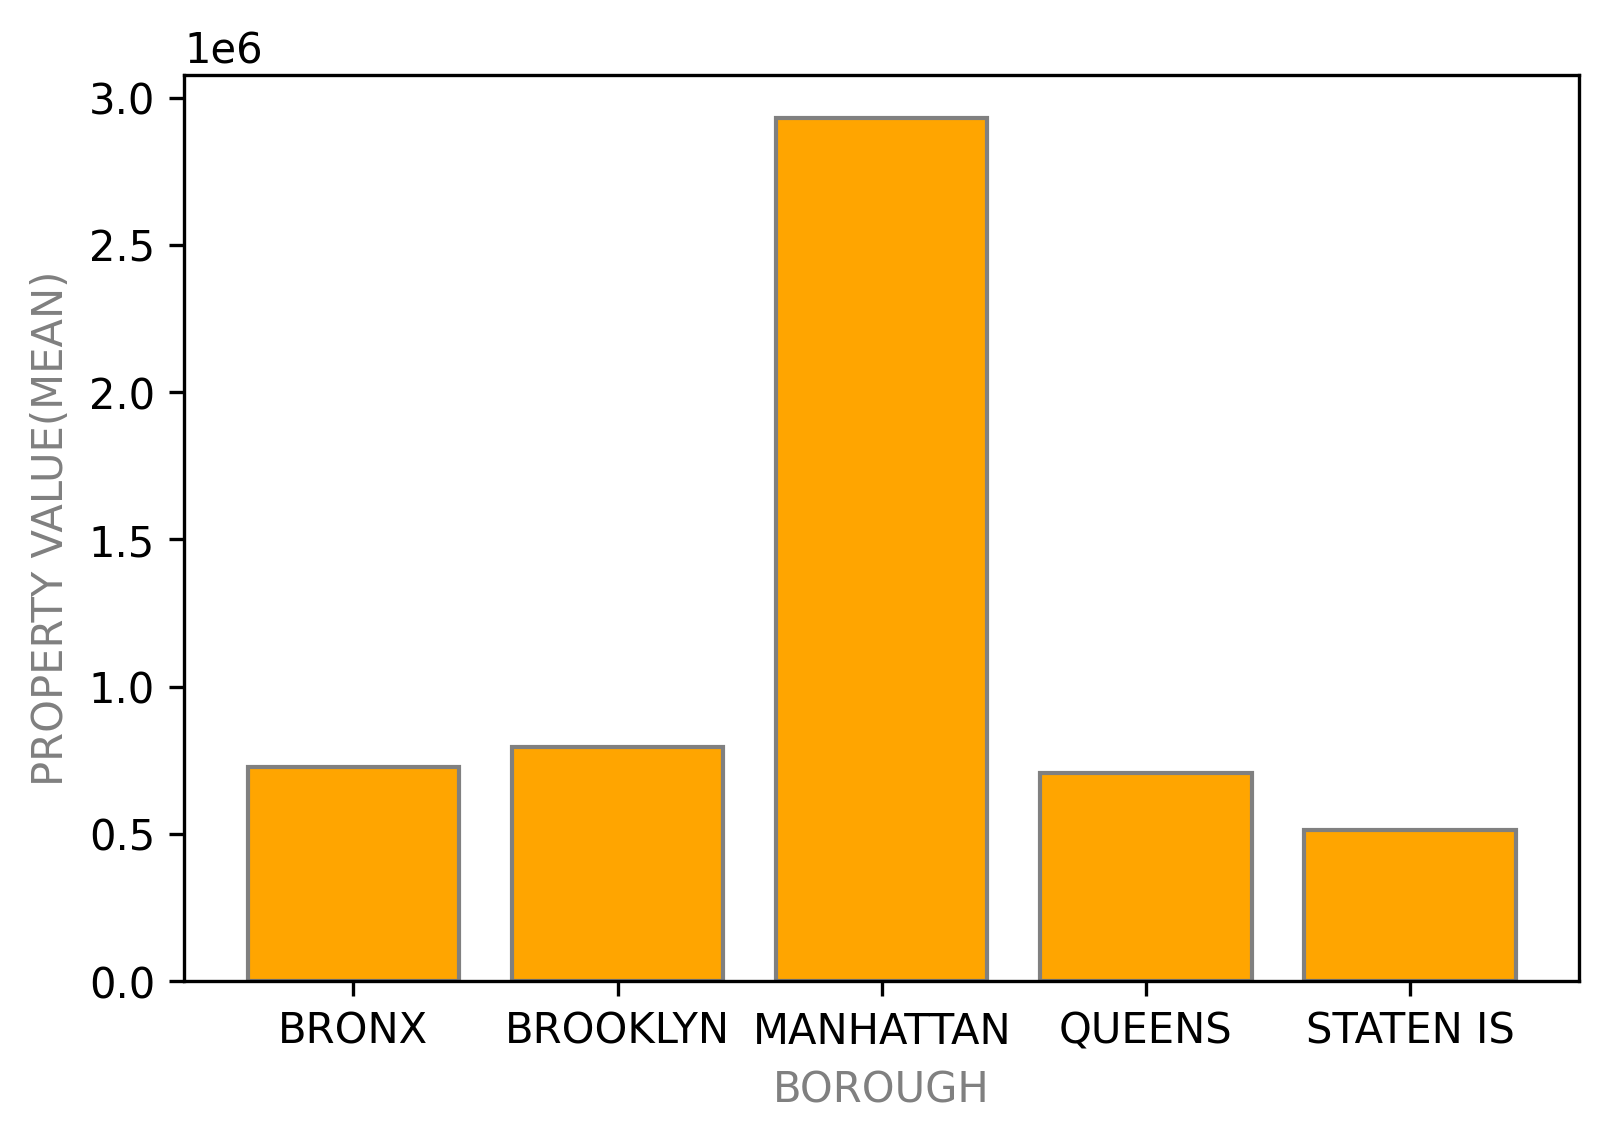

In [ ]:
#visualizing the average(mean) property by borough
plt.figure(dpi=300)
plt.bar(prop_group.index, prop_group['FULLVAL'], color=['orange'], edgecolor=['gray'])
plt.xlabel('BOROUGH', color = 'gray')
plt.ylabel('PROPERTY VALUE(MEAN)', color='gray')


#plt.scatter(propVal['BORO'],propVal['FULLVAL'])
# x1,x2,y1,y2 = plt.axis()  
# plt.axis((0,7786157000, y1, y2))

Text(0, 0.5, 'PROPERTY VALUE(MEAN)')

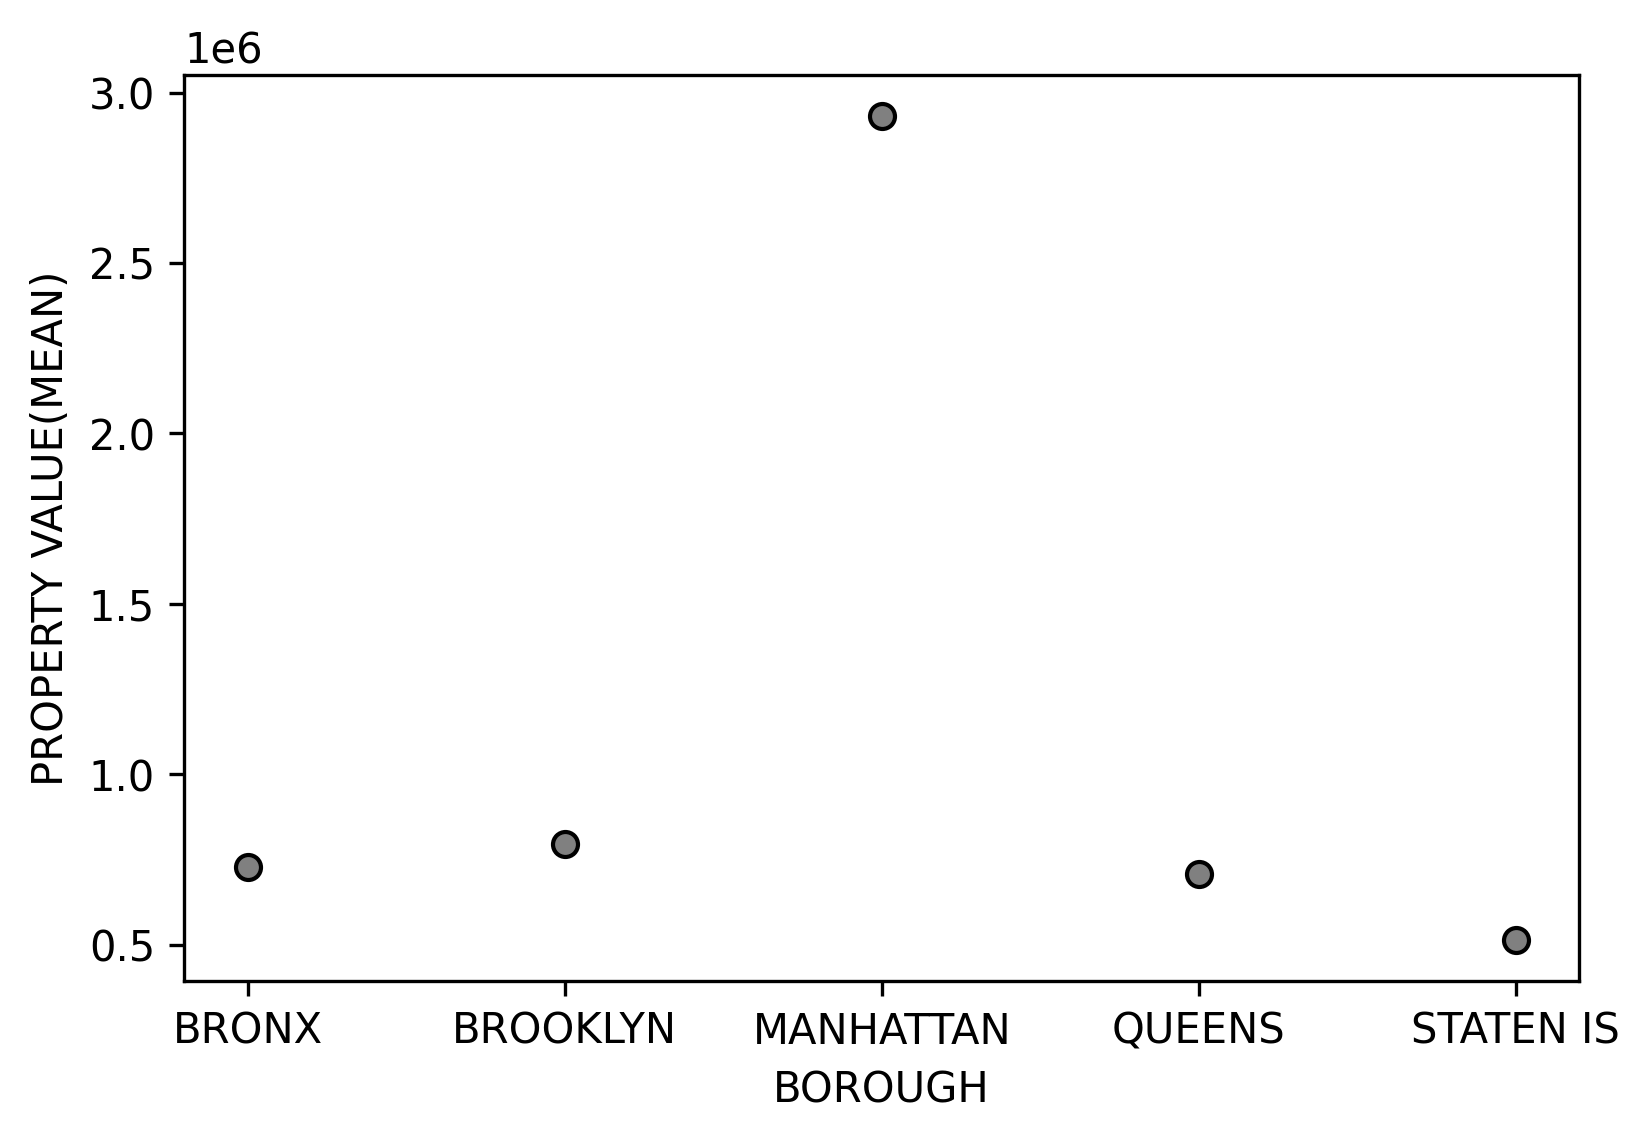

In [ ]:
plt.figure(dpi=300)
plt.scatter(prop_group.index, prop_group['FULLVAL'], color=['gray'], edgecolor=['black'])
plt.xlabel('BOROUGH', color = 'black')
plt.ylabel('PROPERTY VALUE(MEAN)', color='black')


In [ ]:
import time
import numpy as

start = time.time()
np.mean(propVal['Borough'])
end = time.time()

print('numpy: {}'.format(start-end))

start = time.time()
propVal['Borough'].mean()
end = time.time()

print('pandas.mean: {}'.format(start-end))

TypeError: ignored